In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from drive.MyDrive.masterthesis.My_masterthesis.utils import listcsv, TrainTestSplit, init_logger, extract_datasets
from drive.MyDrive.masterthesis.My_masterthesis.model import MyRNN
from drive.MyDrive.masterthesis.My_masterthesis.Dataset import MyDataset
import logging


In [ ]:
class MAEloss(nn.Module):
    def __init__(self):
        super(MAEloss, self).__init__()

    def forward(self, prediction, label):
        MAE = torch.mean(torch.abs(prediction - label))
        return MAE

In [ ]:
input_dim = 50

num_layers = 1
input_size = 1
output_dim = 15
hidden_dim = 40
drop_out = 0
bidirectional = True

batch_sz = 32
lr = 1e-3
epochs = 30

train_data_path = '/content/drive/MyDrive/masterthesis/My_masterthesis/selected_data/train_set.csv'
log_path = '/content/drive/MyDrive/masterthesis/My_masterthesis/train_logs/process.log'


In [ ]:
init_logger(log_path=log_path)
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)

In [ ]:
Train_x_arr, Train_y_arr, Test_x_arr, Test_y_arr = extract_datasets(train_data_path, input_dim, output_dim)

Datasets successfully extracted, with:            
Train_x: (401757, 50, 1)            
Train_y: (401757, 15, 1)            
Test_x: (172100, 50, 1)            
Test_y: (172100, 15, 1)


In [ ]:
train_dataset = MyDataset(Train_x_arr, Train_y_arr)
test_dataset = MyDataset(Test_x_arr, Test_y_arr)
train_loader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_sz, shuffle=True)
# x, y = train_dataset[1]
# print(x, '\n', y)

USE_CUDA = torch.cuda.is_available()
device = 'cuda' if USE_CUDA else 'cpu'

model = MyRNN(num_layers=num_layers, input_dim=input_size, hidden_dim=hidden_dim, output_dim=output_dim, bidirectional=bidirectional, drop_out=drop_out).to(device)
criterion = MAEloss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_epoch_losses, test_epoch_losses = [], []

for handler in logging.root.handlers[:]:
  logging.root.removeHandler(handler)
init_logger(log_path=log_path)
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)

logging.info(f'\nTraining Starts! input_window = {input_dim}, num_layers = {num_layers}, output_widow = {output_dim},\
        hidden_dim = {hidden_dim}, bidirectional = {bidirectional}, drop_out = {drop_out}\
        lr = {lr}, batch_sz = {batch_sz}, epochs = {epochs}')

for epoch in range(epochs):
    tr_e_loss = 0
    tt_e_loss = 0

    model.train()
    for x, y in train_loader:
        x = x.to(device)
        y = y.squeeze().to(device)

        optimizer.zero_grad()
        preds = model(x).squeeze()
        loss = criterion(preds, y)
        tr_e_loss += loss.item()
        loss.backward()
        optimizer.step()

    tr_e_loss_mean = tr_e_loss / len(train_loader)
    train_epoch_losses.append(tr_e_loss_mean)

    model.eval()
    for x, y in test_loader:
        with torch.no_grad():
            x = x.to(device)
            y = y.squeeze().to(device)

            preds = model(x).squeeze()
            t_loss = criterion(preds, y)
            tt_e_loss += t_loss.item()

    tt_e_loss_mean = tt_e_loss / len(test_loader)
    test_epoch_losses.append(tt_e_loss_mean)
    for handler in logging.root.handlers[:]:
      logging.root.removeHandler(handler)
    init_logger(log_path=log_path)
    logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)
    logging.info(f'Epoch: {epoch}, train loss: {tr_e_loss_mean}, validation: {tt_e_loss_mean}')
    print(f'Epoch No.{epoch+1} has been finished.')


Training Starts! input_window = 50, num_layers = 1, output_widow = 15,        hidden_dim = 40, bidirectional = True, drop_out = 0        lr = 0.001, batch_sz = 32, epochs = 30
Epoch: 0, train loss: 0.07400308014066131, validation: 0.06772202493799157


Epoch No.1 has been finished.


Epoch: 1, train loss: 0.06239315215653986, validation: 0.06234879831108745


Epoch No.2 has been finished.


Epoch: 2, train loss: 0.05916145659630064, validation: 0.059806945375498397


Epoch No.3 has been finished.


Epoch: 3, train loss: 0.057400597415772484, validation: 0.06129672788921553


Epoch No.4 has been finished.


Epoch: 4, train loss: 0.056234120702195196, validation: 0.061275790326905354


Epoch No.5 has been finished.


Epoch: 5, train loss: 0.05532236388498381, validation: 0.05823674225124601


Epoch No.6 has been finished.


Epoch: 6, train loss: 0.05460663253462965, validation: 0.05728720755200832


Epoch No.7 has been finished.


Epoch: 7, train loss: 0.054062669007356116, validation: 0.05831560994311267


Epoch No.8 has been finished.


Epoch: 8, train loss: 0.053615296397644514, validation: 0.057093370994987555


Epoch No.9 has been finished.


Epoch: 9, train loss: 0.053212968752304426, validation: 0.057318644947177595


Epoch No.10 has been finished.


Epoch: 10, train loss: 0.05283177587638002, validation: 0.0559931878366863


Epoch No.11 has been finished.


Epoch: 11, train loss: 0.052515046633349764, validation: 0.0560947218876963


Epoch No.12 has been finished.


Epoch: 12, train loss: 0.05220695599462586, validation: 0.0560929956381057


Epoch No.13 has been finished.


Epoch: 13, train loss: 0.051929965338731655, validation: 0.05606978424489055


Epoch No.14 has been finished.


Epoch: 14, train loss: 0.05171628297740176, validation: 0.055755522831385185


Epoch No.15 has been finished.


Epoch: 15, train loss: 0.05149534291887084, validation: 0.05610838505403274


Epoch No.16 has been finished.


Epoch: 16, train loss: 0.051297148104055335, validation: 0.05536454165990489


Epoch No.17 has been finished.


Epoch: 17, train loss: 0.051122445287349834, validation: 0.05562042910345958


Epoch No.18 has been finished.


Epoch: 18, train loss: 0.0509182781755497, validation: 0.05545876864783658


Epoch No.19 has been finished.


Epoch: 19, train loss: 0.05072031985509923, validation: 0.0571523428200113


Epoch No.20 has been finished.


Epoch: 20, train loss: 0.05061674215721448, validation: 0.0557802820127706


Epoch No.21 has been finished.


Epoch: 21, train loss: 0.05045917359722629, validation: 0.05580029838641773


Epoch No.22 has been finished.


Epoch: 22, train loss: 0.050324546025152794, validation: 0.05541093507374745


Epoch No.23 has been finished.


Epoch: 23, train loss: 0.05022399943991042, validation: 0.05547492839721504


Epoch No.24 has been finished.


Epoch: 24, train loss: 0.05005721159246707, validation: 0.05606515249706629


Epoch No.25 has been finished.


Epoch: 25, train loss: 0.049942825688920806, validation: 0.05537970499974419


Epoch No.26 has been finished.


Epoch: 26, train loss: 0.0498464410548213, validation: 0.05574320493877865


Epoch No.27 has been finished.


Epoch: 27, train loss: 0.04974687114989957, validation: 0.055448172258694146


Epoch No.28 has been finished.


Epoch: 28, train loss: 0.049627440013006265, validation: 0.055321765262969454


Epoch No.29 has been finished.


Epoch: 29, train loss: 0.04953402476166407, validation: 0.05696769982685795


Epoch No.30 has been finished.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
xl = np.arange(input_dim, input_dim + output_dim)
xl


array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

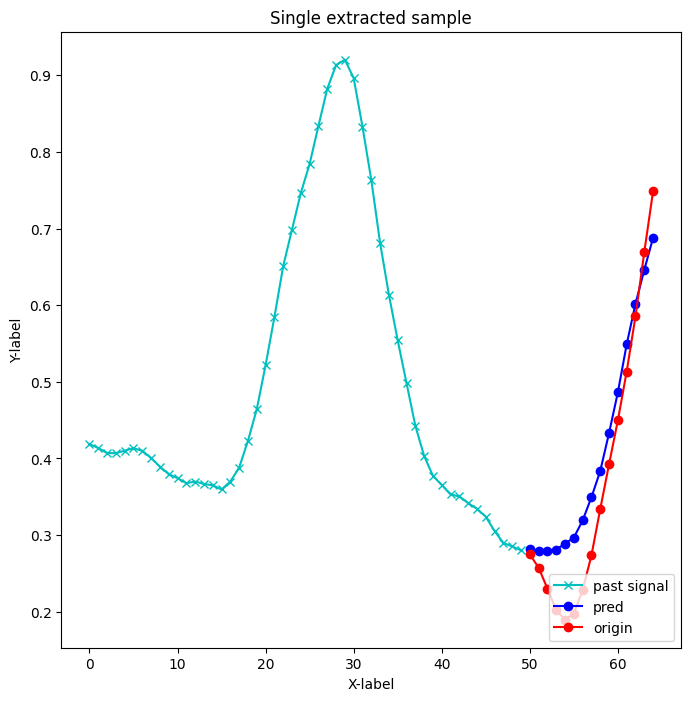

In [ ]:
test_num = 1000

Train_x_arr = Train_x_arr.reshape(-1, input_dim)
x = Train_x_arr[test_num].reshape(1, input_dim, 1)
x = torch.Tensor(x).to(device)
preds = model(x).squeeze()
yl = preds.detach().cpu().numpy()

past = Train_x_arr[test_num]
x1 = np.arange(input_dim)
x2 = np.arange(input_dim, input_dim + output_dim)
yll = Train_y_arr[test_num].reshape(output_dim, )

fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))
ax1.plot(x1, past, marker='x', linestyle='-', color='c', label='past signal')
ax1.plot(x2, yl, marker='o', linestyle='-', color='b', label='pred')
ax1.plot(x2, yll, marker='o', linestyle='-', color='r', label='origin')

ax1.set_title('Single extracted sample')
ax1.set_xlabel('X-label')
ax1.set_ylabel('Y-label')
ax1.legend(loc = 'lower right')

plt.show()

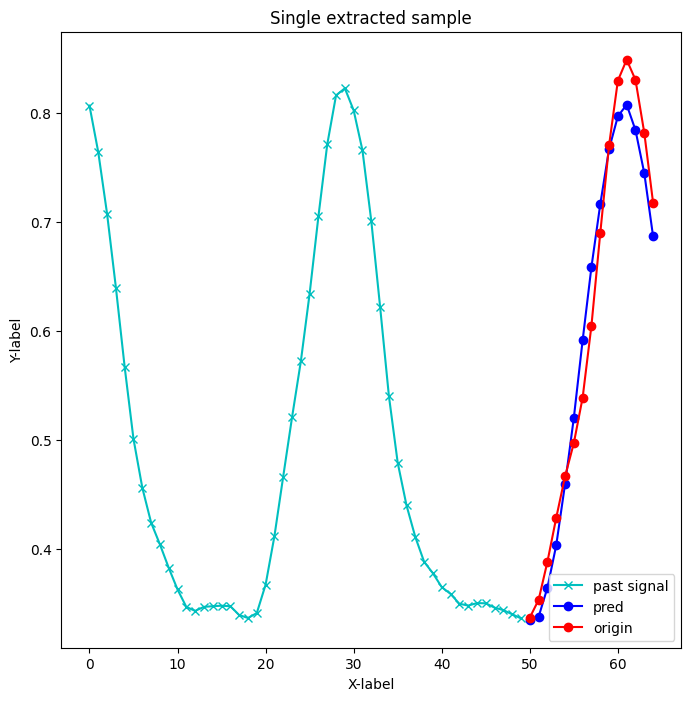

In [ ]:
test_num =700

Test_x_arr = Test_x_arr.reshape(-1, input_dim)
x = Test_x_arr[test_num].reshape(1, input_dim, 1)
x = torch.Tensor(x).to(device)
preds = model(x).squeeze()
yl = preds.detach().cpu().numpy()

past = Test_x_arr[test_num]
x1 = np.arange(input_dim)
x2 = np.arange(input_dim, input_dim + output_dim)
yll = Test_y_arr[test_num].reshape(output_dim, )

fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))
ax1.plot(x1, past, marker='x', linestyle='-', color='c', label='past signal')
ax1.plot(x2, yl, marker='o', linestyle='-', color='b', label='pred')
ax1.plot(x2, yll, marker='o', linestyle='-', color='r', label='origin')

ax1.set_title('Single extracted sample')
ax1.set_xlabel('X-label')
ax1.set_ylabel('Y-label')
ax1.legend(loc = 'lower right')

plt.show()

In [ ]:
torch.save(model.state_dict(), f'/content/drive/MyDrive/masterthesis/My_masterthesis/model_state_dict/bz{batch_sz}_lr{lr}_ep{epochs}_in{input_dim}_out{output_dim}_h{hidden_dim}_layers{num_layers}_bi{bidirectional}_dr{drop_out}.pt')